# Exploratory Data Analysis
Author: Alex Searle

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
sns.set_theme(style="darkgrid")

In [2]:
# Read in the data from preprocessing and feature engineering
result_df = pd.read_csv('Data/Modeling_v1.csv')
result_df.drop(columns=['Unnamed: 0'], inplace=True)
result_df.top_3 = result_df.top_3.astype('int')

In [3]:
# Checking What columns we have
result_df.columns

Index(['driverId', 'grid', 'positionOrder', 'points', 'statusId', 'year',
       'round', 'top3_driver_season_percentage', 'top_3',
       'driver_avg_finish_pos_season', 'Constructor_Top3_Percent',
       'top3_driver_season_percentage_lag', 'driver_avg_finish_pos_season_lag',
       'Constructor_Top3_Percent_lag'],
      dtype='object')

In [4]:
# getting info about the numerical data in the data set
result_df.describe().T

,count,mean,std,min,25%,50%,75%,max
driverId,15923.0,236.870251,268.986381,1.0,35.000000,137.000000,305.000000,855.000000
grid,15923.0,10.021353,6.611259,0.0,4.000000,9.000000,15.000000,33.000000
positionOrder,15923.0,11.627394,7.437181,1.0,5.000000,11.000000,17.000000,38.000000
points,15923.0,2.547702,4.856168,0.0,0.000000,0.000000,3.000000,50.000000
statusId,15923.0,14.262827,23.437646,1.0,1.000000,6.000000,12.000000,141.000000
year,15923.0,1993.782516,18.099683,1951.0,1980.000000,1993.000000,2010.000000,2023.000000
round,15923.0,8.889154,4.581516,2.0,5.000000,8.000000,12.000000,22.000000
top3_driver_season_percentage,15923.0,16.122812,25.575189,0.0,0.000000,0.000000,25.000000,100.000000
top_3,15923.0,0.165358,0.371515,0.0,0.000000,0.000000,0.000000,1.000000
driver_avg_finish_pos_season,15923.0,11.818508,3.645146,3.0,9.412935,11.311111,13.804762,33.133333


In [5]:
print(f'class 1: {result_df[result_df.top_3 == True].top_3.count() / result_df.shape[0]:.2%}')

class 1: 16.54%


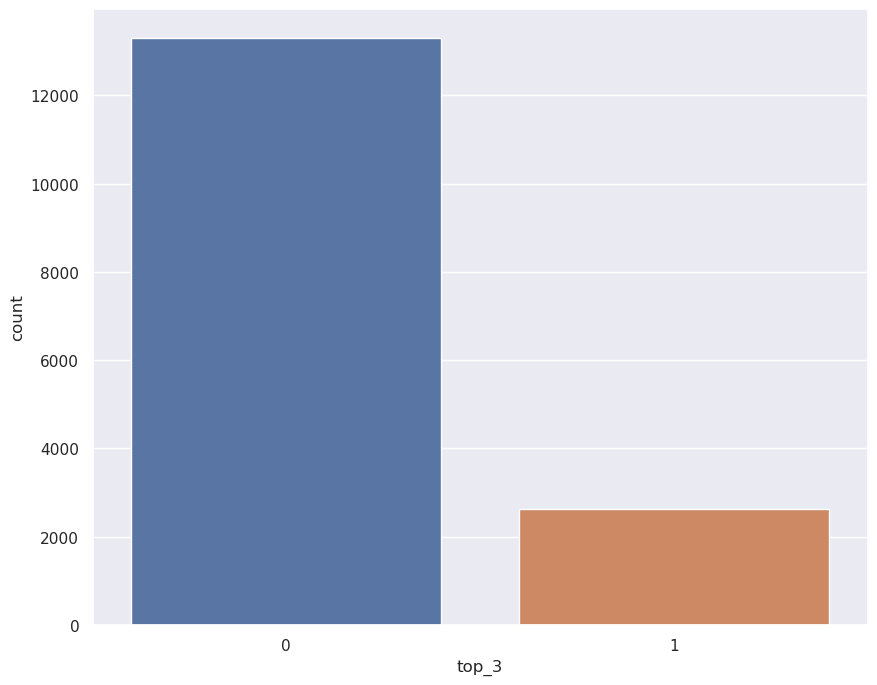

In [6]:
# Distribution of the target which is positionOrder
fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(data=result_df, x='top_3', ax=ax)
plt.savefig('Images/TargetDistribution.png')
plt.show()

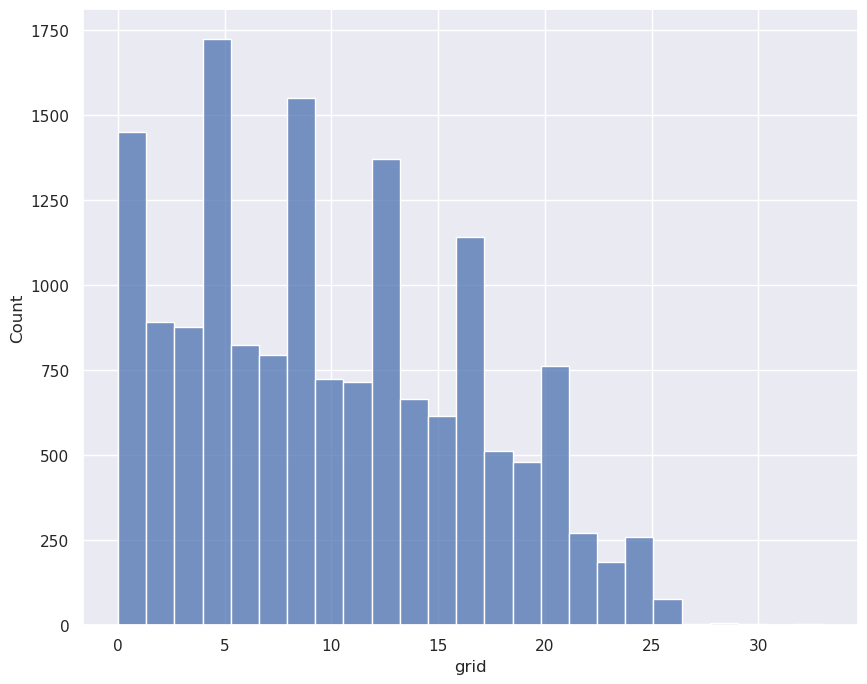

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=result_df, x='grid', bins=25, ax=ax)
plt.savefig(f'Images/GridDistribution.png')
plt.show()

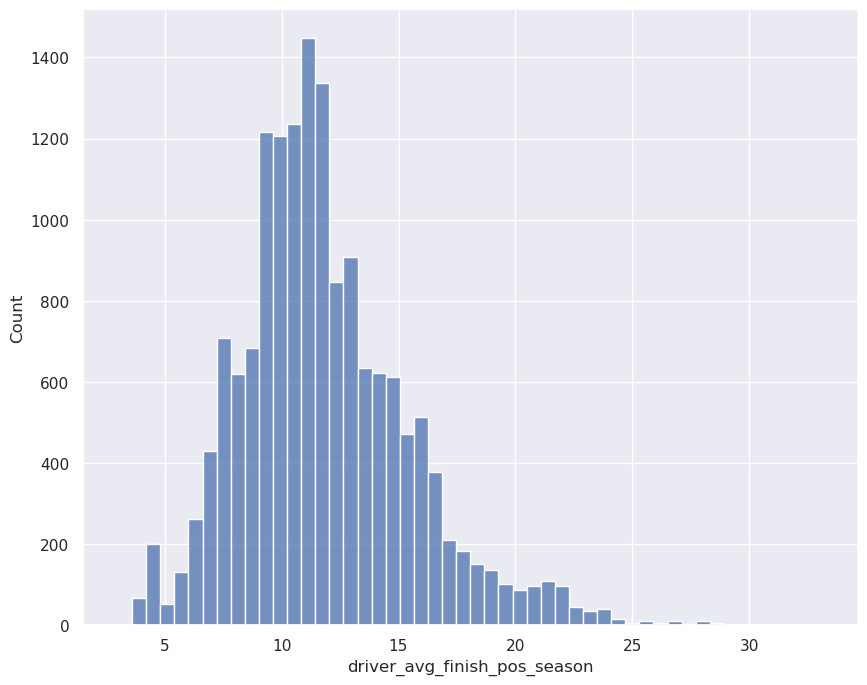

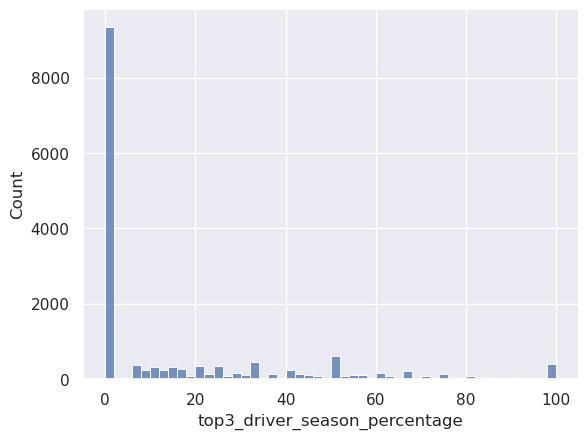

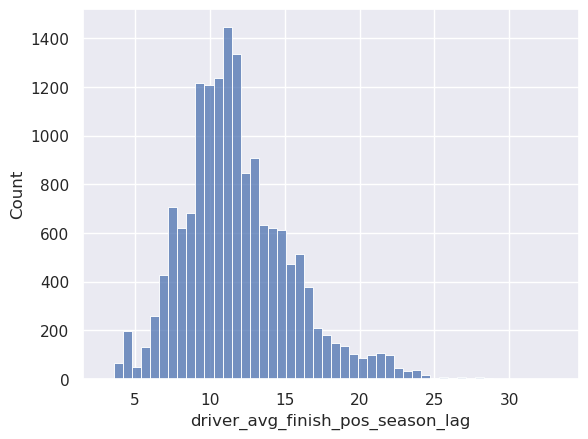

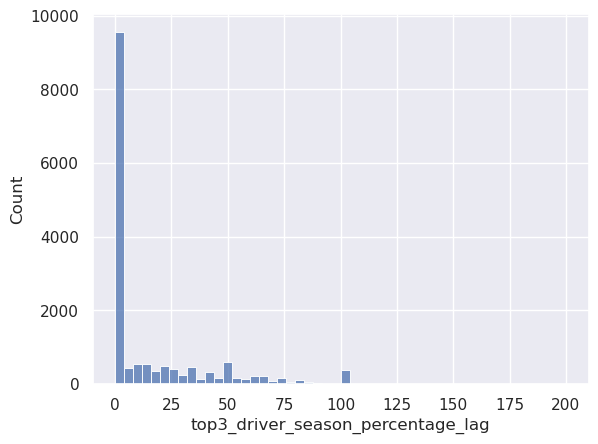

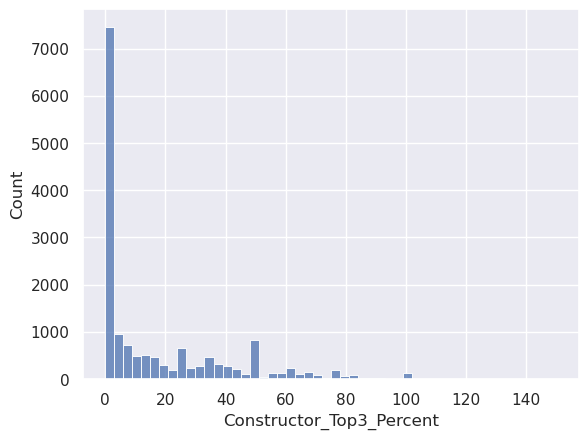

In [8]:
# Getting Distribution Plots
features = ['driver_avg_finish_pos_season', 'top3_driver_season_percentage', 'driver_avg_finish_pos_season_lag', 'top3_driver_season_percentage_lag', 'Constructor_Top3_Percent']
fig, ax = plt.subplots(figsize=(10,8))
for feature in features:
    sns.histplot(data=result_df, x=feature, bins=50)
    plt.savefig(f'Images/{feature}Distribution.png')
    plt.show()

### Getting general overview of relationships

/home/alexsearle/anaconda3/envs/testing/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


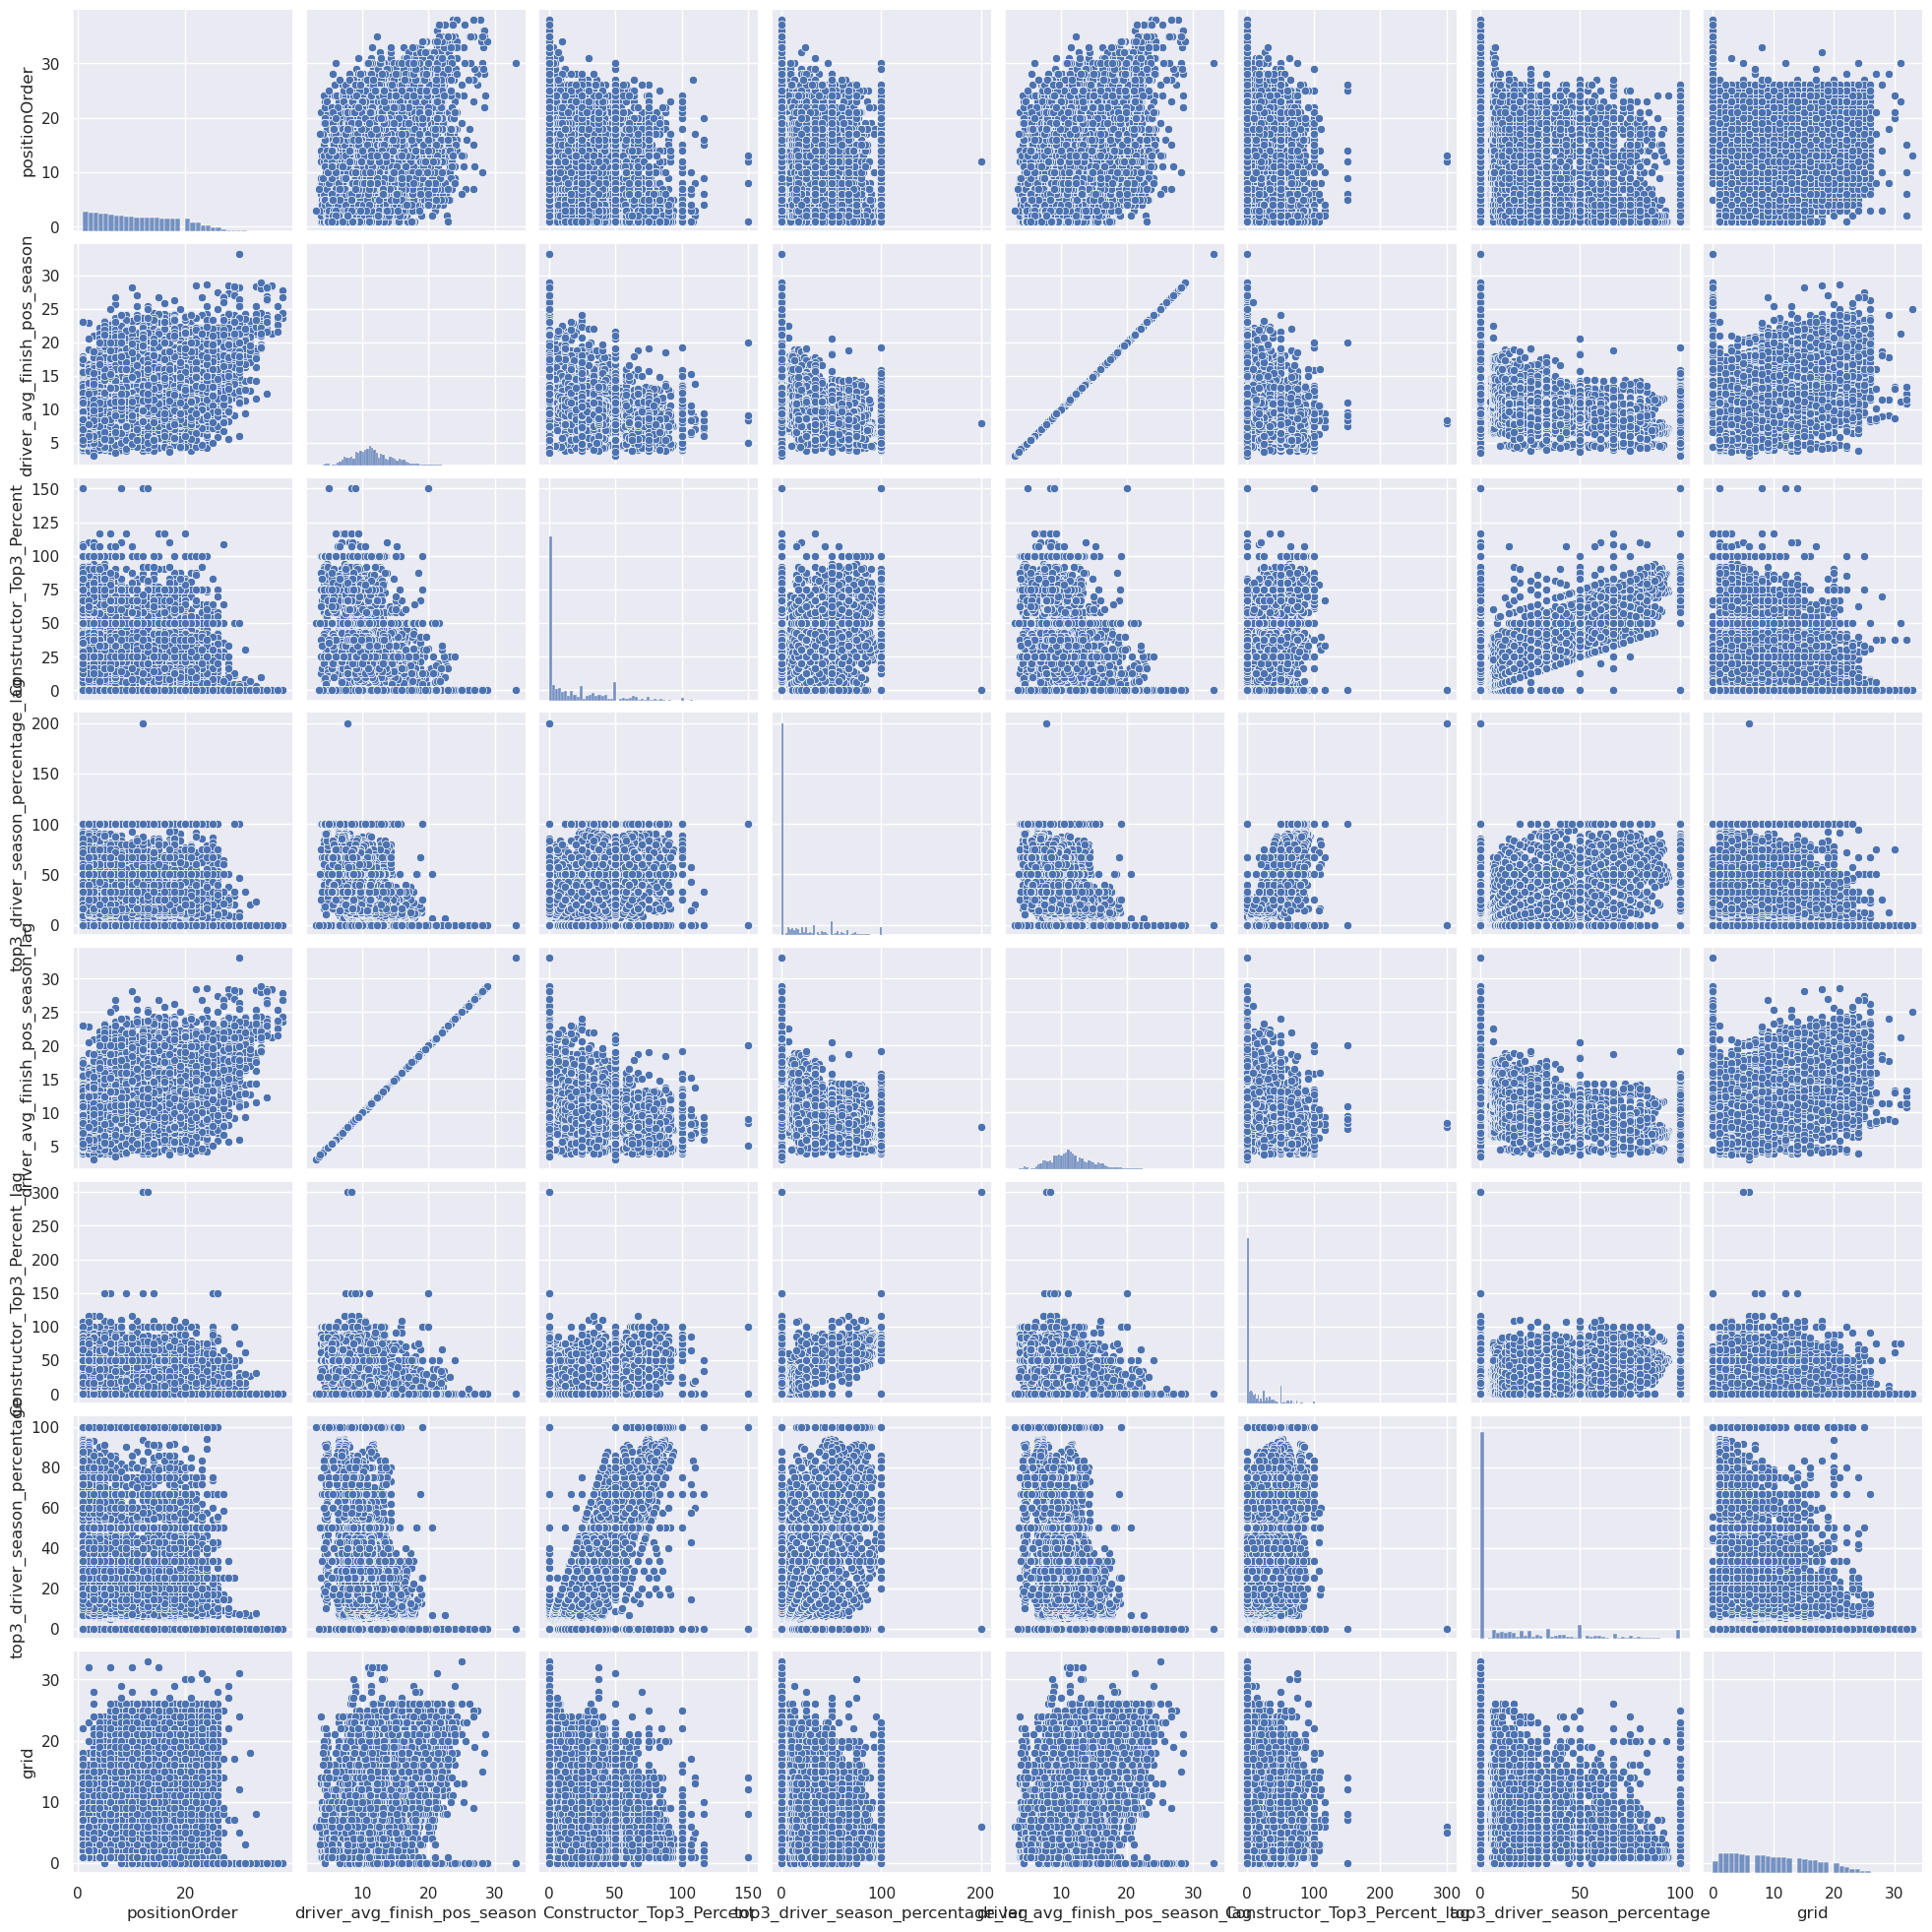

In [9]:
sns.pairplot(result_df[['positionOrder', 'driver_avg_finish_pos_season', 'Constructor_Top3_Percent',
                        'top3_driver_season_percentage_lag', 'driver_avg_finish_pos_season_lag',
                        'Constructor_Top3_Percent_lag',
                        'top3_driver_season_percentage', 'grid']])

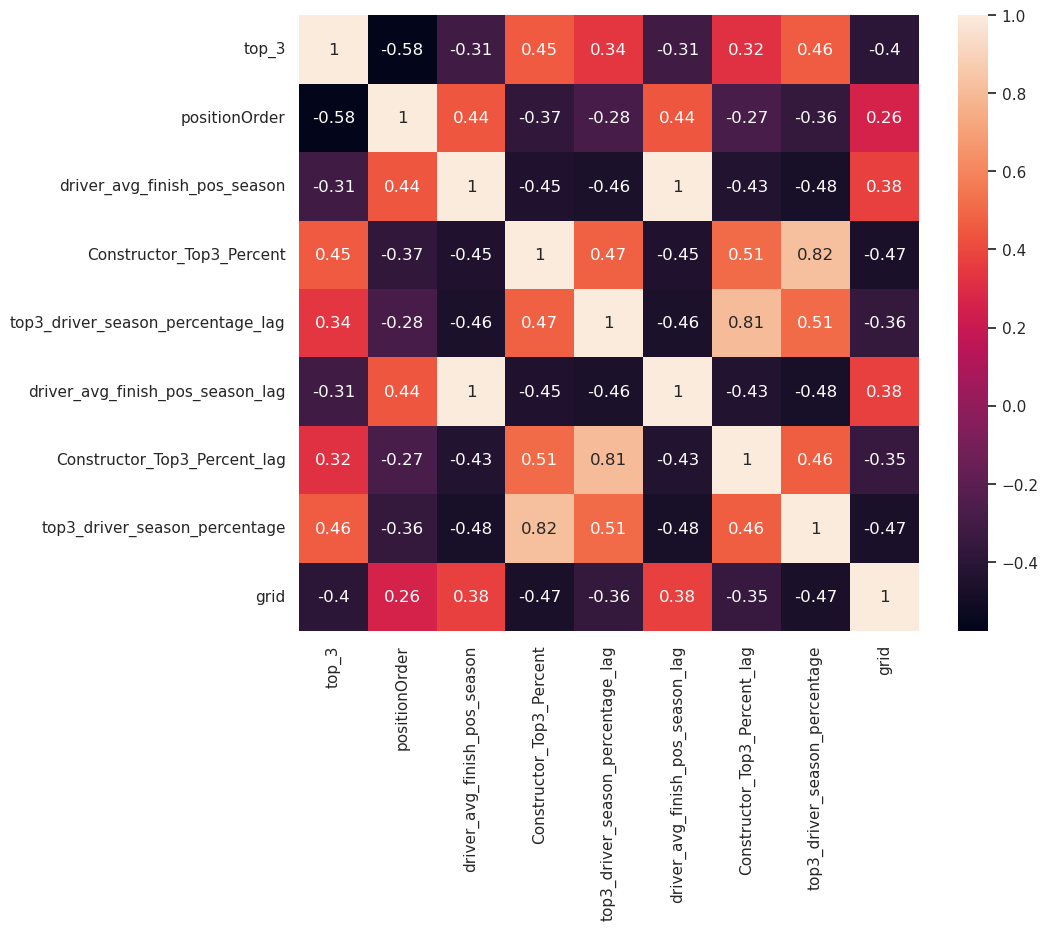

In [10]:
# making a correlation map
corr = result_df[['top_3', 'positionOrder', 'driver_avg_finish_pos_season', 'Constructor_Top3_Percent',
                  'top3_driver_season_percentage_lag', 'driver_avg_finish_pos_season_lag',
                  'Constructor_Top3_Percent_lag',
                  'top3_driver_season_percentage', 'grid']].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax=ax)
plt.savefig('Images/CorrelationMap.png', bbox_inches="tight")
plt.show()

### Taking closer look at varaibles that are closely correlated with positionOrder

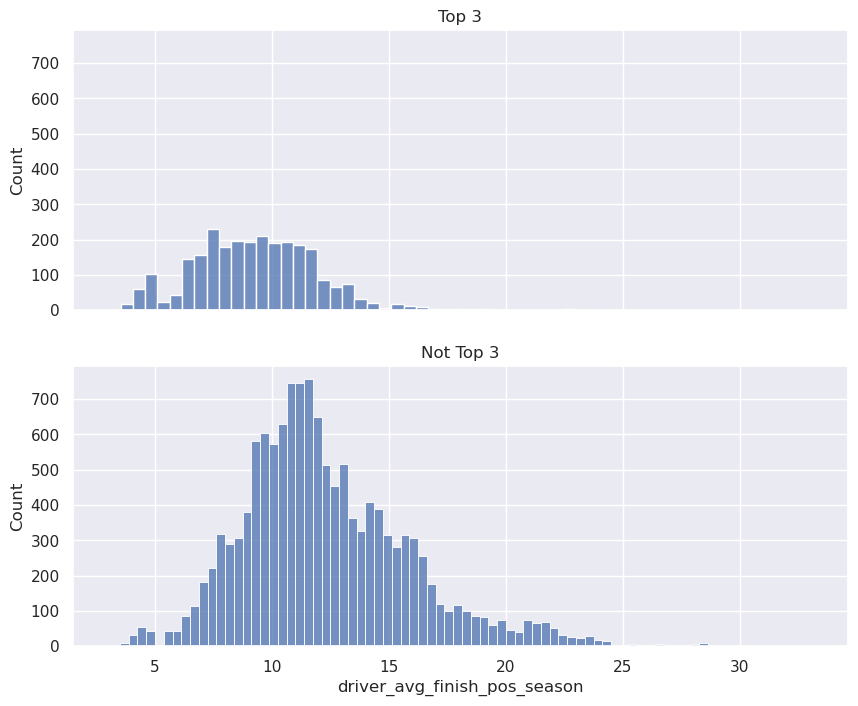

In [11]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='driver_avg_finish_pos_season', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='driver_avg_finish_pos_season', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/PositionOrderVsdriver_avg_finish_pos_season.png')
plt.show()

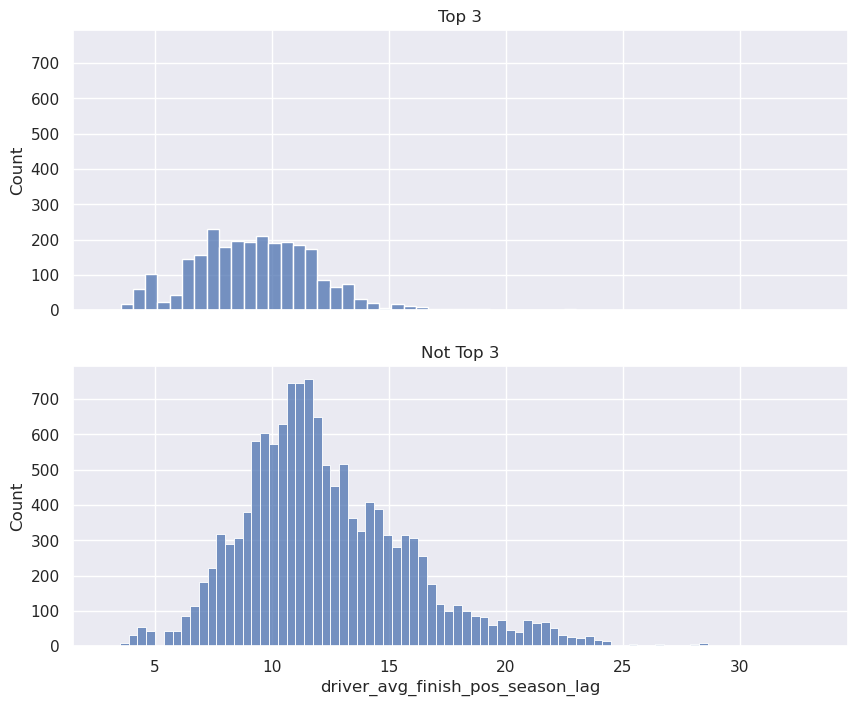

In [12]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='driver_avg_finish_pos_season_lag', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='driver_avg_finish_pos_season_lag', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/driver_avg_pos_season_lag.png')
plt.show()

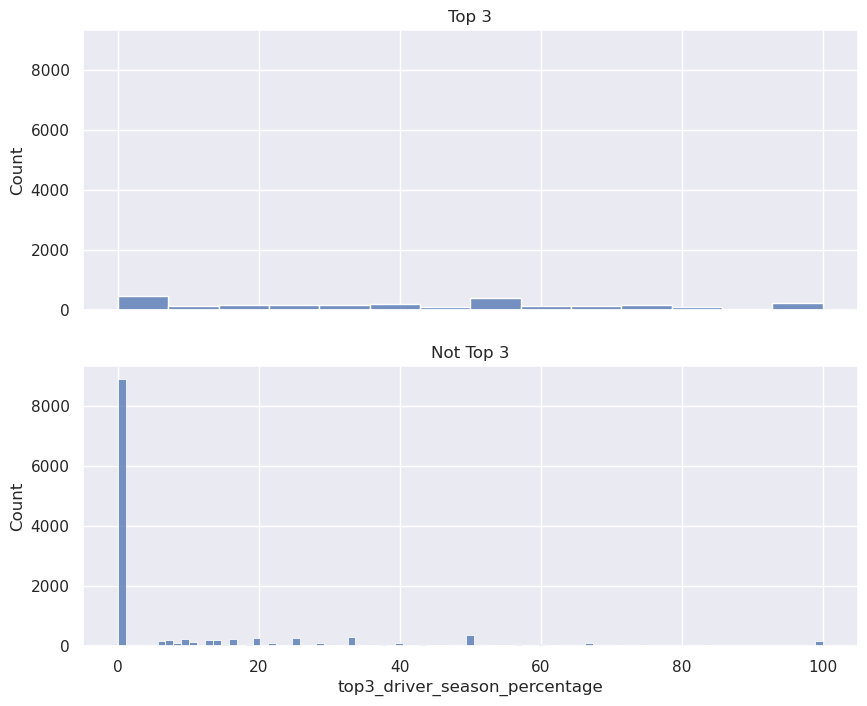

In [13]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='top3_driver_season_percentage', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='top3_driver_season_percentage', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/top3_driver_season_percentage.png')
plt.show()

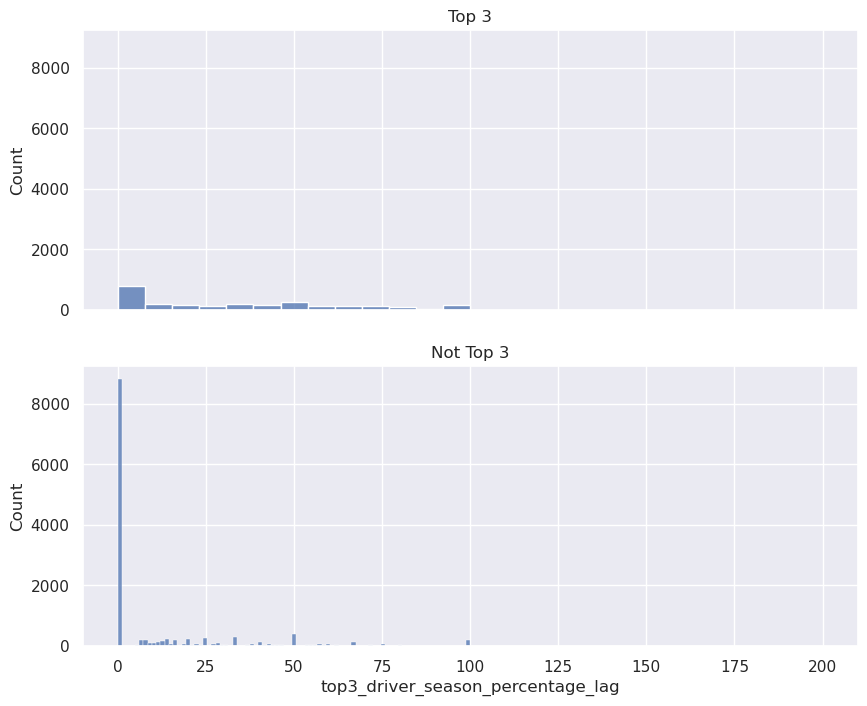

In [14]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='top3_driver_season_percentage_lag', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='top3_driver_season_percentage_lag', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/top3_driver_season_percentage_lag.png')
plt.show()

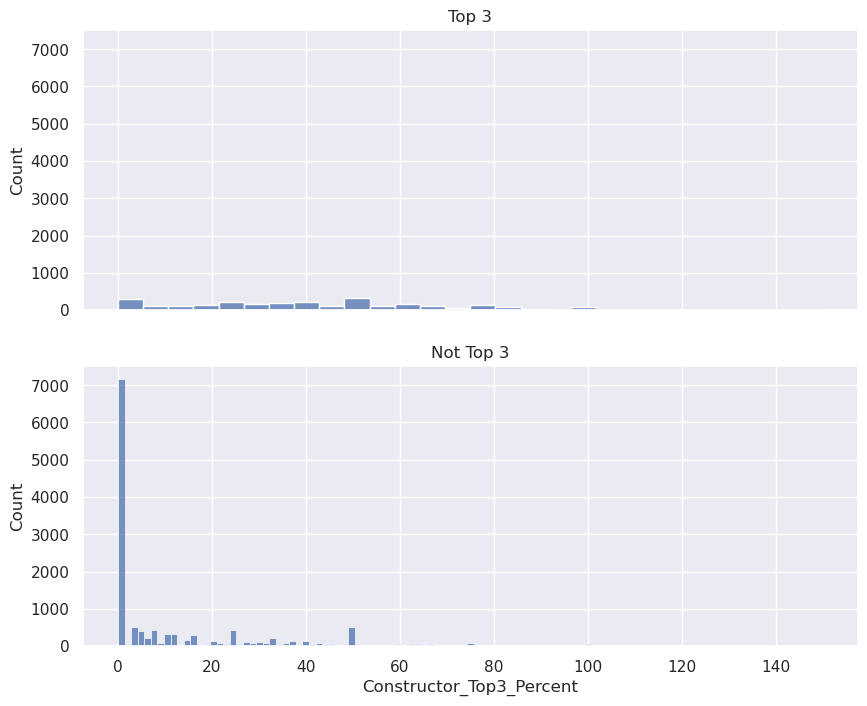

In [15]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='Constructor_Top3_Percent', ax=ax[0])
sns.histplot(result_df[result_df.top_3 == 0], x='Constructor_Top3_Percent', ax=ax[1])
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/Constructor_Top_3Percent.png')
plt.show()

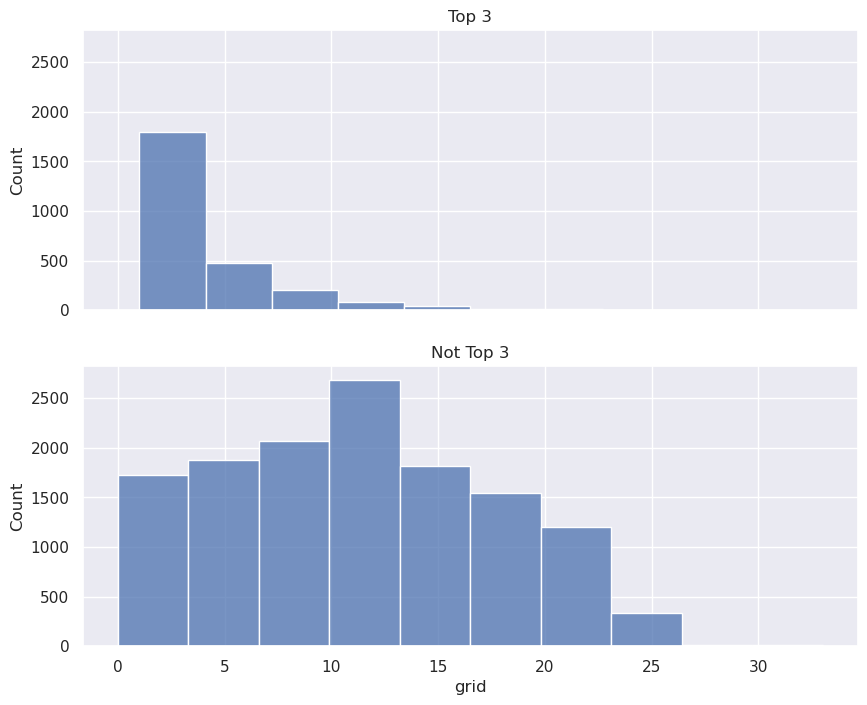

In [16]:
fig, ax = plt.subplots(figsize=(10,8), sharex=True, sharey=True, nrows=2)
sns.histplot(result_df[result_df.top_3 == 1], x='grid', ax=ax[0], bins=10)
sns.histplot(result_df[result_df.top_3 == 0], x='grid', ax=ax[1], bins=10)
ax[0].set_title('Top 3')
ax[1].set_title('Not Top 3')
plt.savefig('Images/grid.png')
plt.show()

## Modeling

In [17]:
# starting our modeling with a Decision Tree
# Splitting our model based on years to avoid data leakage
features = ['driver_avg_finish_pos_season', 'top3_driver_season_percentage', 'driver_avg_finish_pos_season_lag', 'top3_driver_season_percentage_lag', 'Constructor_Top3_Percent', 'grid']
train = result_df[result_df.year < 2000]
test = result_df[result_df.year >= 2000]
X_train = train[features]
X_test = test[features]
y_train = train['top_3']
y_test = test['top_3']

params = {
    'criterion': ['entropy', 'log_loss', 'gini'],
    'max_depth': list(range(3,15)),
    'min_samples_split': list(range(20, 40)),
    'min_impurity_decrease':[.0001, .001, .01, .1]
}
DecisionTreeGridSearch = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, n_jobs=-1, scoring='roc_auc')
DecisionTreeGridSearch.fit(X_train, y_train)
print(f'Best score: {DecisionTreeGridSearch.best_score_}')
print(f'Best params: {DecisionTreeGridSearch.best_params_}')
best_decision_tree = DecisionTreeGridSearch.best_estimator_
test_prediction = best_decision_tree.predict(X_test)
test_score = roc_auc_score(y_test, test_prediction)
print(f'Test score: {test_score}')

Best score: 0.8442378872467838
Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.0001, 'min_samples_split': 39}
Test score: 0.7072829576882729


In [18]:
print(f'Train Accuracy: {best_decision_tree.score(X_train, y_train)}')
print(f'Test Accuracy: {best_decision_tree.score(X_test, y_test)}')

Train Accuracy: 0.8529878371232152
Test Accuracy: 0.8676561533704391


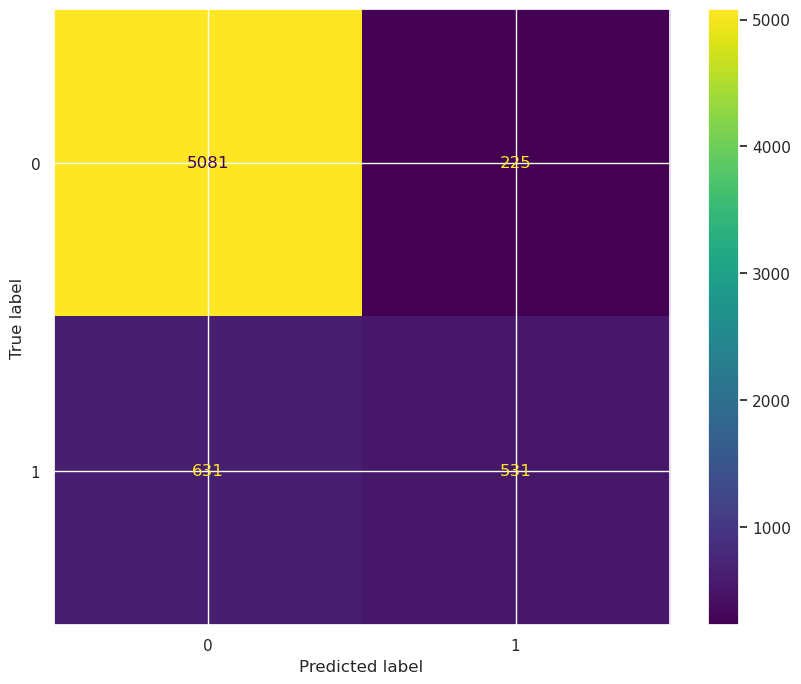

In [19]:
cm = confusion_matrix(y_test, test_prediction)
fig, ax = plt.subplots(figsize=(10,8))
display = ConfusionMatrixDisplay(cm, display_labels=best_decision_tree.classes_)
display.plot(ax=ax)

In [20]:
# Now going to use a Random Forest
param_grid={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': list(range(5,15)),
    'min_samples_split': list(range(20,40)),
    'min_impurity_decrease':[.0001, .001, .01, .1]
}
randomforestgridsearch = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, n_jobs=-1, scoring='roc_auc')
randomforestgridsearch.fit(X_train, y_train)
print(f'Best score: {randomforestgridsearch.best_score_}')
print(f'Best params: {randomforestgridsearch.best_params_}')
best_forest = randomforestgridsearch.best_estimator_
pred = best_forest.predict(X_test)
print(f'Test score: {roc_auc_score(y_test, pred)}')

Best score: 0.8547746205183587
Best params: {'criterion': 'entropy', 'max_depth': 7, 'min_impurity_decrease': 0.001, 'min_samples_split': 38}
Test score: 0.6918934690893238


In [21]:
print(f'Train Accuracy: {best_forest.score(X_train, y_train)}')
print(f'Test Accuracy: {best_forest.score(X_test, y_test)}')

Train Accuracy: 0.8548915917503966
Test Accuracy: 0.8699752628324057
